In [95]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_colwidth=200

In [96]:
def jaccard_similarity(str1, str2):
    string_set1 = set(str1.split(' '))
    string_set2 = set(str2.split(' '))
    return len(string_set1.intersection(string_set2))/len(string_set2.union(string_set1))

In [97]:
# dump pkl into a pandas dataframe. 
data = pd.read_pickle('data/string_study.pkl')

In [98]:
data.head()

,atime,task,deployment,raw,dtime,msg,_info
0,1524387149611,attach-volume,wig_project_003,2018-04-22 10:52:29.611 17979 ERROR rallytester.rallytester [-] [nova attach-volume wig_project_003] Task failed: Rally tired waiting 1440.00 seconds for Server rally-9db3-aPln:176b6fd3-8a2d-4b60...,2018-04-22 08:00:00,waiting for Server to become ('ACTIVE'),Rally tired waiting 1440.00 seconds for Server rally-9db3-aPln:176b6fd3-8a2d-4b60-a5bd-73575c4ad161 to become ('ACTIVE') current status BUILD
1,1524387185889,boot-from-volume-linux,gva_shared_016,"2018-04-22 10:53:05.889 25667 ERROR rallytester.rallytester [-] [nova boot-from-volume-linux gva_shared_016] Task failed: Quota exceeded for cores, instances: Requested 1, 1, but already used 10,...",2018-04-22 08:00:00,"Quota exceeded for cores, instances: Requested ..... cores, instances (HTTP 403) (Request-ID: req-xy","Quota exceeded for cores, instances: Requested 1, 1, but already used 10, 10 of 10, 10 cores, instances (HTTP 403) (Request-ID: req-23b5fe81-0bab-4f42-84e9-97e3e6847c04)"
2,1524387196073,boot-linux,gva_shared_016,"2018-04-22 10:53:16.073 25840 ERROR rallytester.rallytester [-] [nova boot-linux gva_shared_016] Task failed: Quota exceeded for cores, instances: Requested 1, 1, but already used 10, 10 of 10, 1...",2018-04-22 08:00:00,"Quota exceeded for cores, instances: Requested ..... cores, instances (HTTP 403) (Request-ID: req-xy","Quota exceeded for cores, instances: Requested 1, 1, but already used 10, 10 of 10, 10 cores, instances (HTTP 403) (Request-ID: req-f1b55ece-6bd1-475b-9692-7e443d44d52b)"
3,1524387321429,boot-linux,gva_project_013,2018-04-22 10:55:21.429 19322 ERROR rallytester.rallytester [-] [nova boot-linux gva_project_013] Task failed: Rally tired waiting 1440.00 seconds for Server rally-15fc-N4mw:77640b75-df94-4e6d-91...,2018-04-22 08:00:00,waiting for Server to become ('ACTIVE'),Rally tired waiting 1440.00 seconds for Server rally-15fc-N4mw:77640b75-df94-4e6d-91d6-3338fffcdc91 to become ('ACTIVE') current status BUILD
4,1524387330897,attach-volume,gva_project_023,2018-04-22 10:55:30.897 19363 ERROR rallytester.rallytester [-] [nova attach-volume gva_project_023] Task failed: Rally tired waiting 1440.00 seconds for Server rally-1c07-9a14:c7c5f878-2495-45bf...,2018-04-22 08:00:00,waiting for Server to become ('ACTIVE'),Rally tired waiting 1440.00 seconds for Server rally-1c07-9a14:c7c5f878-2495-45bf-873d-da11b5d88001 to become ('ACTIVE') current status BUILD


In [99]:
data["word_count"] = data.msg.apply(lambda x:len(x.split(' ')))

In [100]:
data.head()

,atime,task,deployment,raw,dtime,msg,_info,word_count
0,1524387149611,attach-volume,wig_project_003,2018-04-22 10:52:29.611 17979 ERROR rallytester.rallytester [-] [nova attach-volume wig_project_003] Task failed: Rally tired waiting 1440.00 seconds for Server rally-9db3-aPln:176b6fd3-8a2d-4b60...,2018-04-22 08:00:00,waiting for Server to become ('ACTIVE'),Rally tired waiting 1440.00 seconds for Server rally-9db3-aPln:176b6fd3-8a2d-4b60-a5bd-73575c4ad161 to become ('ACTIVE') current status BUILD,6
1,1524387185889,boot-from-volume-linux,gva_shared_016,"2018-04-22 10:53:05.889 25667 ERROR rallytester.rallytester [-] [nova boot-from-volume-linux gva_shared_016] Task failed: Quota exceeded for cores, instances: Requested 1, 1, but already used 10,...",2018-04-22 08:00:00,"Quota exceeded for cores, instances: Requested ..... cores, instances (HTTP 403) (Request-ID: req-xy","Quota exceeded for cores, instances: Requested 1, 1, but already used 10, 10 of 10, 10 cores, instances (HTTP 403) (Request-ID: req-23b5fe81-0bab-4f42-84e9-97e3e6847c04)",13
2,1524387196073,boot-linux,gva_shared_016,"2018-04-22 10:53:16.073 25840 ERROR rallytester.rallytester [-] [nova boot-linux gva_shared_016] Task failed: Quota exceeded for cores, instances: Requested 1, 1, but already used 10, 10 of 10, 1...",2018-04-22 08:00:00,"Quota exceeded for cores, instances: Requested ..... cores, instances (HTTP 403) (Request-ID: req-xy","Quota exceeded for cores, instances: Requested 1, 1, but already used 10, 10 of 10, 10 cores, instances (HTTP 403) (Request-ID: req-f1b55ece-6bd1-475b-9692-7e443d44d52b)",13
3,1524387321429,boot-linux,gva_project_013,2018-04-22 10:55:21.429 19322 ERROR rallytester.rallytester [-] [nova boot-linux gva_project_013] Task failed: Rally tired waiting 1440.00 seconds for Server rally-15fc-N4mw:77640b75-df94-4e6d-91...,2018-04-22 08:00:00,waiting for Server to become ('ACTIVE'),Rally tired waiting 1440.00 seconds for Server rally-15fc-N4mw:77640b75-df94-4e6d-91d6-3338fffcdc91 to become ('ACTIVE') current status BUILD,6
4,1524387330897,attach-volume,gva_project_023,2018-04-22 10:55:30.897 19363 ERROR rallytester.rallytester [-] [nova attach-volume gva_project_023] Task failed: Rally tired waiting 1440.00 seconds for Server rally-1c07-9a14:c7c5f878-2495-45bf...,2018-04-22 08:00:00,waiting for Server to become ('ACTIVE'),Rally tired waiting 1440.00 seconds for Server rally-1c07-9a14:c7c5f878-2495-45bf-873d-da11b5d88001 to become ('ACTIVE') current status BUILD,6


In [129]:
class_by_len = set(data["word_count"])

TypeError: 'set' object is not subscriptable

In [102]:
class_by_len

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20}

In [103]:
bin_len = len(class_by_len)
bin_len

19

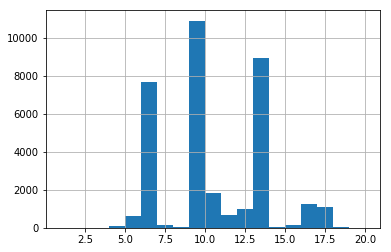

In [104]:
# Analysis of messages categorized into words
data.word_count.hist(bins = bin_len)

In [53]:
# Take the messages that have the highest frequncy to perform the analsyis.

In [134]:
filtered_data = data.query("word_count == 10")

In [142]:
msg_array = np.array(filtered_data.msg.copy())
msg_array

array(['Error executing rally task. Check the deployment is correctly configured.',
       'Device not found.\\nTraceback (most recent call last):\\n\\n  File "/usr/lib/python2.7/site-packages/os',
       'Error executing rally task. Check the deployment is correctly configured.',
       ...,
       'Device not found.\\nTraceback (most recent call last):\\n\\n  File "/usr/lib/python2.7/site-packages/os',
       'Error executing rally task. Check the deployment is correctly configured.',
       'Error executing rally task. Check the deployment is correctly configured.'],
      dtype=object)

In [143]:
len(msg_array)

1842

In [90]:
# Test Jaccard Similarity
jaccard_similarity("waiting for Server to become ('ACTIVE')", "Server is ('ACTIVE')")

0.2857142857142857

In [151]:
jaccard_sim_set = []
for i in range(0, len(msg_array)):
    for j in range(i+1, len(msg_array)):
        jaccard_sim = jaccard_similarity(msg_array[i], msg_array[j])
        jaccard_sim_set.append(jaccard_sim)

In [147]:
jaccard_distance_set

[0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05263157894736842,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05263157894736842,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05263157894736842,
 0.0,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.0,
 0.05263157894736842,
 0.0,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05263157894736842,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05263157894736842,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.05263157894736842,
 0.0,
 0.05263157894736842,
 0.05263157894736842,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05263157894736842,
 0.0,
 0.0,
 0.0,
 0.05263157894736842,
 0.0,
 0.0

In [157]:
len(jaccard_distance_set)

1695561

In [152]:
set(jaccard_distance_set)

{0.0, 0.05263157894736842, 1.0}

In [148]:
jaccard_dataframe = pd.DataFrame(jaccard_distance_set)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1303150f0>]],
      dtype=object)

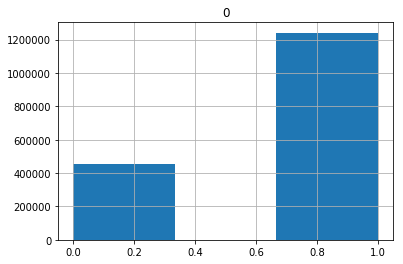

In [156]:
jaccard_dataframe.hist(bins = 3)